### [Image classification](https://www.tensorflow.org/beta/tutorials/images/classification)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
print(tf.__version__)

1.14.0


#### Load data

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [5]:
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

The dataset has the following directory structure:

In [6]:
!tree /a {PATH}

Folder PATH listing
Volume serial number is 00007F40 7A4C:9F1F
C:\USERS\HARSHIL\.KERAS\DATASETS\CATS_AND_DOGS_FILTERED
+---train
|   +---cats
|   \---dogs
\---validation
    +---cats
    \---dogs


In [7]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

#### About the data

In [9]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

In [10]:
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

In [11]:
total_tr, total_val = num_cats_tr + num_dogs_tr, num_cats_val + num_dogs_val

In [12]:
print('Training:\n Cats: {}\t Dogs: {}\nValidation:\n Cats: {}\t Dogs: {}\n{}\nTotal:\n Training: {}\t Validation: {}'.format(num_cats_tr, num_dogs_tr, num_cats_val, num_dogs_val, '-' * 5, total_tr, total_val))

Training:
 Cats: 1000	 Dogs: 1000
Validation:
 Cats: 500	 Dogs: 500
-----
Total:
 Training: 2000	 Validation: 1000


#### Setting up variables to use

In [13]:
BATCH_SIZE = 128
EPOCHS = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

#### Data preparation

Define generators for train and validation images.

In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

Generate proper train and validtion data using above defined generators.

In [15]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                             directory=validation_dir,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='binary')

Found 1000 images belonging to 2 classes.


#### Visualize images

In [17]:
sample_training_images, _ = next(train_data_gen)

Following function plots images in the form of a grid with 1 row and 5 columns.

In [18]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

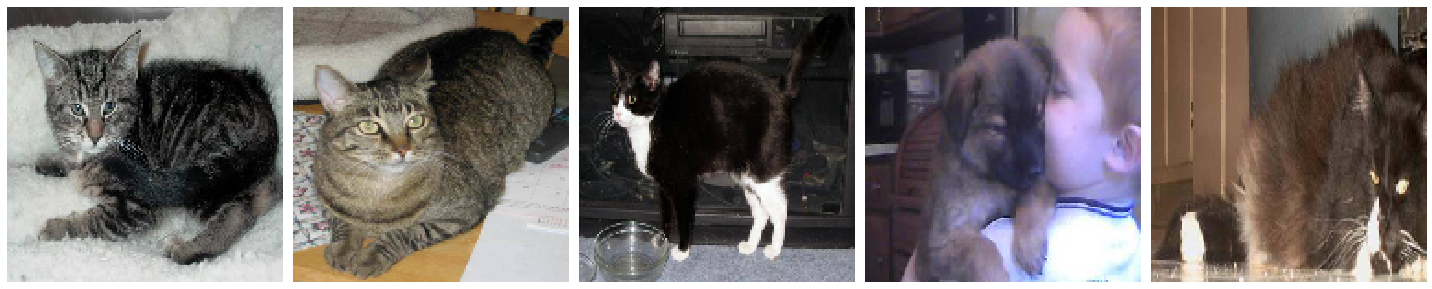

In [19]:
plot_images(sample_training_images[:5])

#### Create the model

In [20]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Compile the model.

In [21]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

#### Fit the model

In [23]:
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=total_tr // BATCH_SIZE,
                              epochs=EPOCHS,
                              validation_data=val_data_gen,
                              validation_steps=total_val // BATCH_SIZE,
                              verbose=2)

Epoch 1/15
15/15 - 68s - loss: 1.0985 - acc: 0.4963 - val_loss: 0.6723 - val_acc: 0.5067
Epoch 2/15
15/15 - 67s - loss: 0.6709 - acc: 0.5737 - val_loss: 0.6436 - val_acc: 0.6071
Epoch 3/15
15/15 - 67s - loss: 0.6980 - acc: 0.5417 - val_loss: 0.6760 - val_acc: 0.6205
Epoch 4/15
15/15 - 69s - loss: 0.6689 - acc: 0.5844 - val_loss: 0.6570 - val_acc: 0.6060
Epoch 5/15
15/15 - 68s - loss: 0.6413 - acc: 0.6277 - val_loss: 0.6158 - val_acc: 0.6529
Epoch 6/15
15/15 - 68s - loss: 0.6096 - acc: 0.6645 - val_loss: 0.6229 - val_acc: 0.6696
Epoch 7/15
15/15 - 69s - loss: 0.5387 - acc: 0.7250 - val_loss: 0.6111 - val_acc: 0.6763
Epoch 8/15
15/15 - 67s - loss: 0.5295 - acc: 0.7420 - val_loss: 0.5778 - val_acc: 0.7042
Epoch 9/15
15/15 - 67s - loss: 0.4601 - acc: 0.7666 - val_loss: 0.6556 - val_acc: 0.6853
Epoch 10/15
15/15 - 67s - loss: 0.4248 - acc: 0.8120 - val_loss: 0.6085 - val_acc: 0.6953
Epoch 11/15
15/15 - 67s - loss: 0.3706 - acc: 0.8360 - val_loss: 0.6022 - val_acc: 0.7199
Epoch 12/15
15/15 -

#### Plot results

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
epochs_range = range(EPOCHS)

Following method will plot training and validation results.

In [26]:
def plot_results(tr, val, met):
    plt.plot(epochs_range, tr, label='Training ' + met)
    plt.plot(epochs_range, val, label='Validation ' + met)
    plt.xlabel('Epochs')
    plt.ylabel(met.title())
    plt.legend(loc='best')

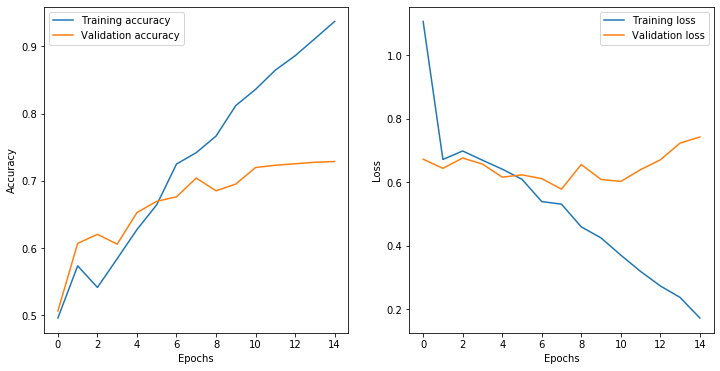

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_results(acc, val_acc, 'accuracy')

plt.subplot(1, 2, 2)
plot_results(loss, val_loss, 'loss')

plt.show()

#### Data augmentation to avoid overfitting

**Horizontal flip**

In [28]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [29]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


Take one image from the training examples and repeat it five times so that augmentation is applied to the same image five times.

In [30]:
augmented_images = [train_data_gen[0][0][0] for _ in range(5)]

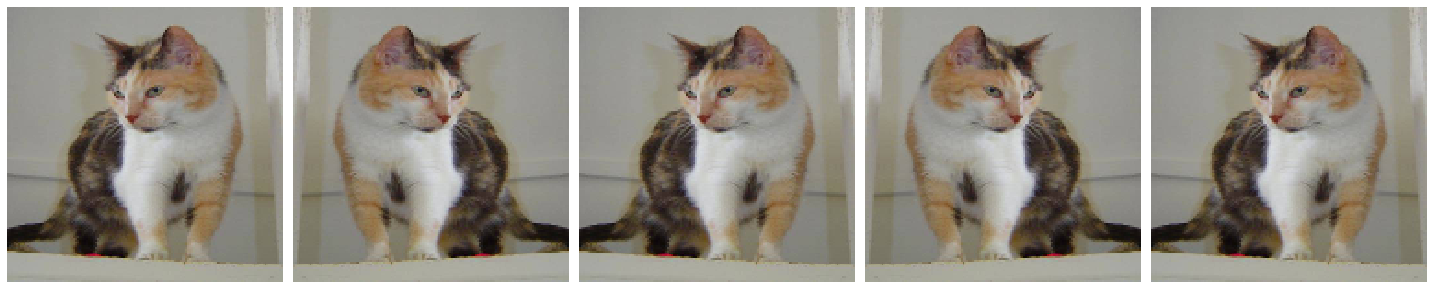

In [31]:
plot_images(augmented_images)

**Rotate image**

In [32]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [33]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [34]:
augmented_images = [train_data_gen[0][0][0] for _ in range(5)]

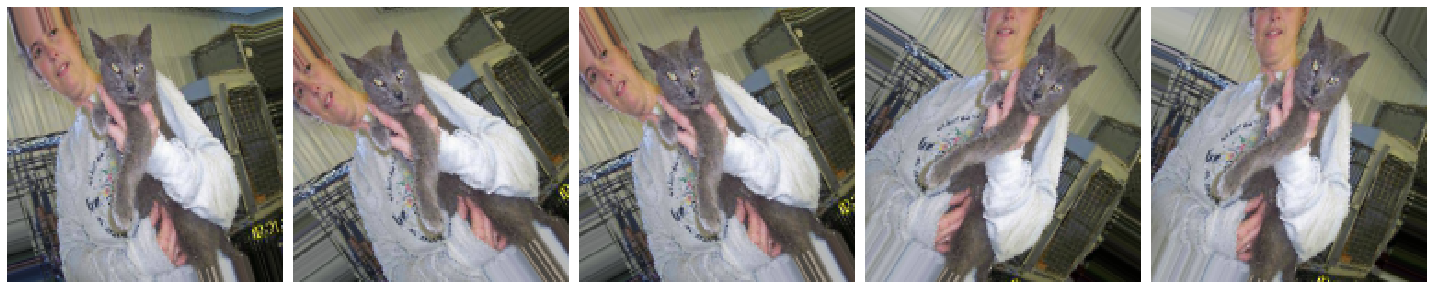

In [35]:
plot_images(augmented_images)

**Zoom augmentation**

In [36]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [37]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [38]:
augmented_images = [train_data_gen[0][0][0] for _ in range(5)]

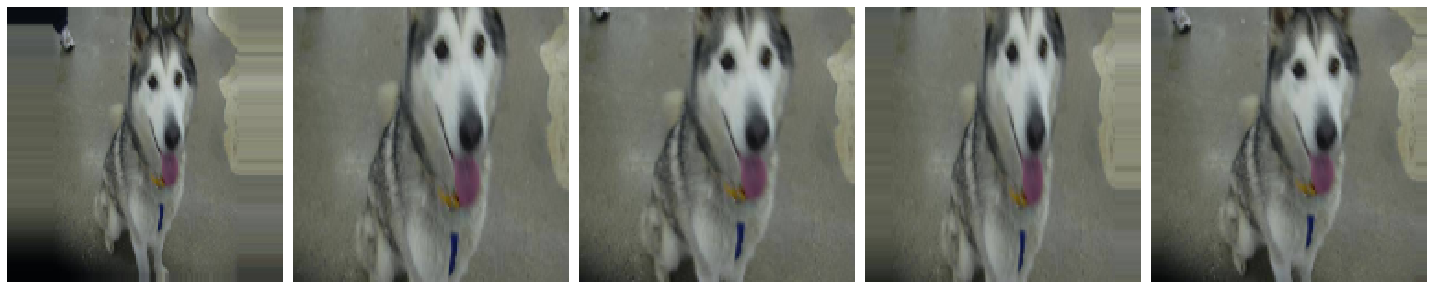

In [39]:
plot_images(augmented_images)

**All together**!

In [40]:
image_gen_train = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)

In [41]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


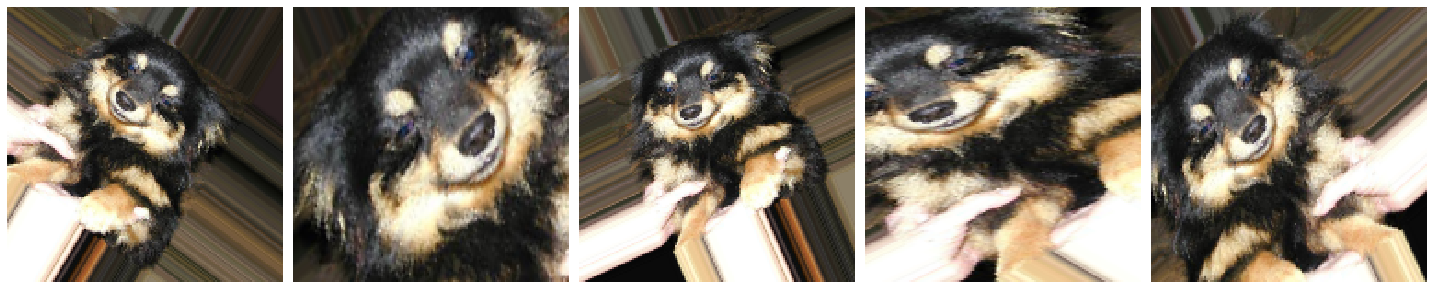

In [42]:
augmented_images = [train_data_gen[0][0][0] for _ in range(5)]
plot_images(augmented_images)

#### Create new model with Dropout

In [43]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [44]:
model_new.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [45]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

#### Fit the new model

In [46]:
history = model_new.fit_generator(train_data_gen,
                                  steps_per_epoch=total_tr // BATCH_SIZE,
                                  epochs=EPOCHS,
                                  validation_data=val_data_gen,
                                  validation_steps=total_val // BATCH_SIZE,
                                  verbose=2)

Epoch 1/15
15/15 - 112s - loss: 1.8114 - acc: 0.5224 - val_loss: 0.6917 - val_acc: 0.5067
Epoch 2/15
15/15 - 122s - loss: 0.6939 - acc: 0.4989 - val_loss: 0.6931 - val_acc: 0.5045
Epoch 3/15
15/15 - 113s - loss: 0.6931 - acc: 0.5155 - val_loss: 0.6947 - val_acc: 0.4955
Epoch 4/15
15/15 - 110s - loss: 0.6926 - acc: 0.5171 - val_loss: 0.6910 - val_acc: 0.4978
Epoch 5/15
15/15 - 110s - loss: 0.6912 - acc: 0.5286 - val_loss: 0.6920 - val_acc: 0.5089
Epoch 6/15
15/15 - 109s - loss: 0.6890 - acc: 0.5262 - val_loss: 0.6863 - val_acc: 0.5647
Epoch 7/15
15/15 - 108s - loss: 0.6846 - acc: 0.5561 - val_loss: 0.6825 - val_acc: 0.5815
Epoch 8/15
15/15 - 95s - loss: 0.6821 - acc: 0.5587 - val_loss: 0.6853 - val_acc: 0.5737
Epoch 9/15
15/15 - 79s - loss: 0.6815 - acc: 0.5705 - val_loss: 0.6772 - val_acc: 0.5681
Epoch 10/15
15/15 - 80s - loss: 0.6779 - acc: 0.5700 - val_loss: 0.6919 - val_acc: 0.5759
Epoch 11/15
15/15 - 82s - loss: 0.6716 - acc: 0.5906 - val_loss: 0.6726 - val_acc: 0.6116
Epoch 12/15


#### Plot new results

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [48]:
epochs_range = range(EPOCHS)

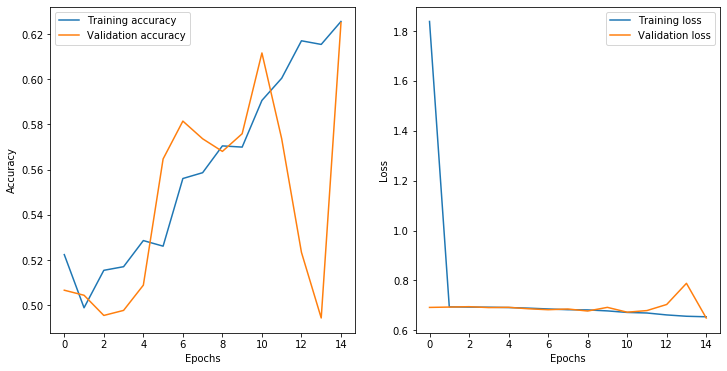

In [49]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_results(acc, val_acc, 'accuracy')

plt.subplot(1, 2, 2)
plot_results(loss, val_loss, 'loss')

plt.show()